In [84]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16}) 
import numpy as np

In [85]:
from scrinet import fits

In [86]:
psf_coords = np.loadtxt("psf_phase_x.txt")
psf_y = np.loadtxt("psf_phase_y.txt")

# psf_coords = np.loadtxt("psf_amp_x.txt")
# psf_y = np.loadtxt("psf_amp_y.txt")

In [87]:
psf_coords.shape

(40, 3)

In [88]:
psf_y.shape

(40, 5)

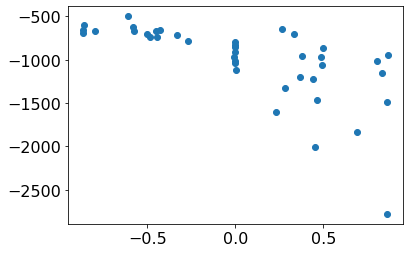

In [89]:
plt.figure()
plt.scatter(psf_coords[:,1], psf_y[:,0])

In [90]:
psf_coords[0]

array([ 0.1600004 , -0.00686666,  0.79998044])

In [91]:
psf_y.shape

(40, 5)

In [92]:
X = psf_coords.copy()
y = psf_y.copy()[:,0]

In [93]:
X.shape

(40, 3)

In [94]:
y.shape

(40,)

In [95]:
# note this is an old functiona and should be replaced with the new one
scale = True
if scale:
    X, y = fits.scale.scale_data(X, y)

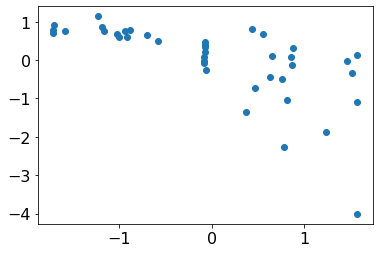

In [96]:
plt.figure()
plt.scatter(X[:,1], y)

In [97]:
max_degs = fits.poly.generate_degrees([3,3,3], max_deg_total=3*3)

In [98]:
len(max_degs)

64

In [99]:
for i, deg in enumerate(max_degs):
    print(f"{i}, {deg}")

0, [0 0 0]
1, [0 0 1]
2, [0 0 2]
3, [0 0 3]
4, [1 0 0]
5, [1 0 1]
6, [1 0 2]
7, [1 0 3]
8, [2 0 0]
9, [2 0 1]
10, [2 0 2]
11, [2 0 3]
12, [3 0 0]
13, [3 0 1]
14, [3 0 2]
15, [3 0 3]
16, [0 1 0]
17, [0 1 1]
18, [0 1 2]
19, [0 1 3]
20, [1 1 0]
21, [1 1 1]
22, [1 1 2]
23, [1 1 3]
24, [2 1 0]
25, [2 1 1]
26, [2 1 2]
27, [2 1 3]
28, [3 1 0]
29, [3 1 1]
30, [3 1 2]
31, [3 1 3]
32, [0 2 0]
33, [0 2 1]
34, [0 2 2]
35, [0 2 3]
36, [1 2 0]
37, [1 2 1]
38, [1 2 2]
39, [1 2 3]
40, [2 2 0]
41, [2 2 1]
42, [2 2 2]
43, [2 2 3]
44, [3 2 0]
45, [3 2 1]
46, [3 2 2]
47, [3 2 3]
48, [0 3 0]
49, [0 3 1]
50, [0 3 2]
51, [0 3 3]
52, [1 3 0]
53, [1 3 1]
54, [1 3 2]
55, [1 3 3]
56, [2 3 0]
57, [2 3 1]
58, [2 3 2]
59, [2 3 3]
60, [3 3 0]
61, [3 3 1]
62, [3 3 2]
63, [3 3 3]


In [100]:
best_lr, best_deg_idx, lrs, (lowest_deg_t, t_losses, t_AICs, t_AICcs, t_BICs) = \
    fits.poly.findpolyfit(X, y, max_degs=max_degs, verbose=False)

In [101]:
np.array(t_AICs).argmin()

58

In [102]:
np.array(t_AICcs).argmin()

52

In [103]:
np.array(t_BICs).argmin()

52

In [104]:
lowest_deg_t

52

In [105]:
best_deg_idx

52

In [106]:
max_degs[best_deg_idx]

array([1, 3, 0])

(1.0, 156.82714625968137)

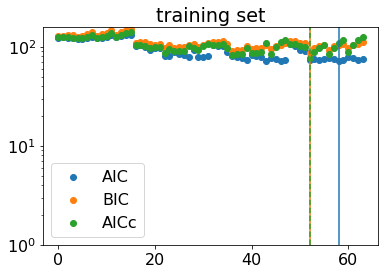

In [107]:
plt.figure()
plt.scatter(range(len(t_AICs)), t_AICs, label='AIC')
plt.scatter(range(len(t_AICs)), t_BICs, label='BIC')
plt.scatter(range(len(t_AICs)), t_AICcs, label='AICc')

plt.axvline(np.argmin(t_AICs), c='C0')
plt.axvline(np.argmin(t_BICs), c='C1')
plt.axvline(np.argmin(t_AICcs), ls='--', c='C2')

plt.legend()
plt.title('training set')

plt.yscale('log')
plt.ylim(1e0)

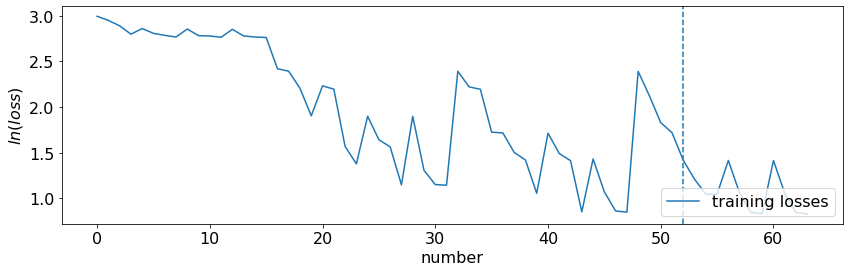

In [108]:
plt.figure(figsize=(14,4))
plt.plot(range(len(t_AICs)), np.log(t_losses), label='training losses')
plt.legend(loc='lower right')
plt.xlabel('number')
plt.ylabel(r'$ln(loss)$')

plt.axvline(lowest_deg_t, c='C0', ls='--')

In [109]:
tloss = best_lr.loss(X, y, method='sum-of-squares')

In [110]:
tloss

4.129739408562898

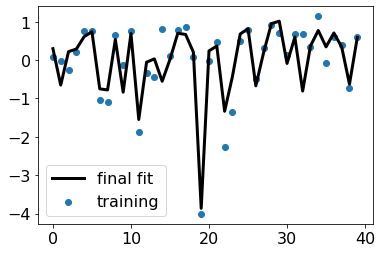

In [111]:
plt.figure()
plt.scatter(range(len(y)), y, label='training')
plt.plot(range(len(y)), best_lr.predict(X), lw=3, c='k', label='final fit')
plt.legend()

# main function

In [112]:
np.where(t_AICs == np.sort(t_AICs)[-5])[0][0]

7

In [113]:
np.where(t_AICs == np.sort(t_AICs)[-5])

(array([7]),)

In [114]:
np.sort(t_AICs)[-5]

126.72715797736959

In [115]:
def fit(X, y, title, maxdeg=3, scaleX=False, scaleY=False):
    
    if scaleX:
        X = X.copy()
        X_scalers = fits.scale.make_scalers(X)
        X = fits.scale.apply_scaler(X, X_scalers)
#         self.save_X_scalers(os.path.join(self.outdir, "X_scalers"))
    if scaleY:
        y = y.copy()
        Y_scalers = fits.scale.make_scalers(y)
        y = fits.scale.apply_scaler(y, Y_scalers)
#         save_Y_scalers(os.path.join(self.outdir, "Y_scalers"))  


    max_degs = fits.poly.generate_degrees([maxdeg, maxdeg, 2], max_deg_total=3*3)
    best_lr, best_deg_idx, lrs, (lowest_deg_t, t_losses, t_AICs, t_AICcs, t_BICs) = \
        fits.poly.findpolyfit(X, y, max_degs=max_degs, verbose=False, method='RMSE')

#     best_lr = fits.poly.LinearPolynomialBasisRegression()
#     best_lr.fit(X, y, maxdegs=[2,2,2])

#     print(f"best degs: {max_degs[best_deg_idx]}")
    
#     if scaleX:
#         X = fits.scale.apply_scaler(X, X_scalers)

    print(f"degs: {best_lr.degrees}")

    yhat = best_lr.predict(X)

    if scaleY:
        y = fits.scale.apply_inverse_scaler(y, Y_scalers)
        yhat = fits.scale.apply_inverse_scaler(yhat, Y_scalers)

    if scaleX:
        X = fits.scale.apply_inverse_scaler(X, X_scalers)
    
    fig, axes = plt.subplots(1, 4, figsize=(20, 4))
    labels = ['eta', 'cos(theta)', 'chi']
    fig.suptitle(title)
    for i in range(len(labels)):

        axes[i].scatter(X[:,i], y, label='training')
        axes[i].scatter(X[:,i], yhat, label='final fit')
        axes[i].set_xlabel(labels[i])
    axes[0].legend()
    axes[3].scatter(range(len(y)), 100*(y-yhat)/y)
    axes[3].set_title('% difference')
        
    plt.show()
    plt.close()
    
    return best_lr

In [116]:
X[:,1]

array([-0.08596387,  1.45588003, -0.06131595, -0.0732717 , -0.93218141,
       -1.58457508,  0.80983939,  1.56422596, -0.70128845,  0.86242686,
       -1.16675161,  1.23396874,  1.51234121,  0.62861094,  0.42973319,
        0.65084081, -0.88417707, -1.17914623,  0.85393966,  1.56424249,
       -0.07841481, -0.07426479,  0.78115627,  0.36522806, -0.58413387,
       -1.71367394,  0.76066293,  0.87135244, -1.70669697, -1.71355952,
        1.57002524, -1.02203447,  0.55511706, -0.07390584, -1.22996127,
       -0.0806041 , -0.91812425, -0.0767789 ,  0.46767224, -0.99643942])

In [117]:
X = psf_coords.copy()
y = psf_y.copy()[:,0]

degs: [[0, 0, 0], [1, 0, 0], [0, 1, 0], [1, 1, 0], [0, 2, 0]]


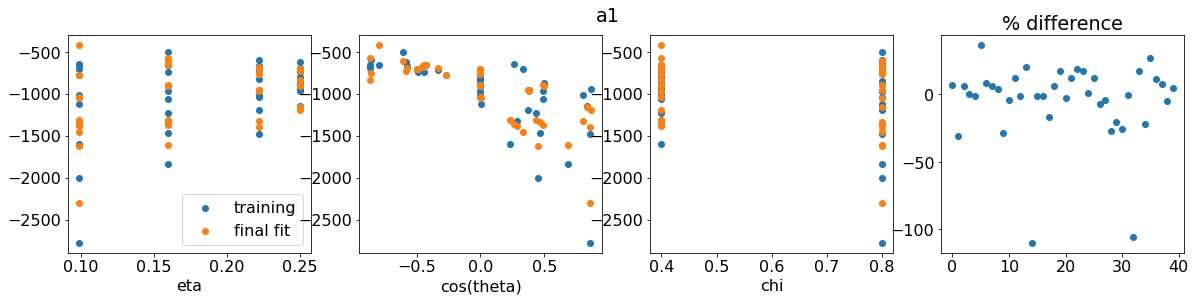

degs: [[0, 0, 0], [0, 1, 0]]


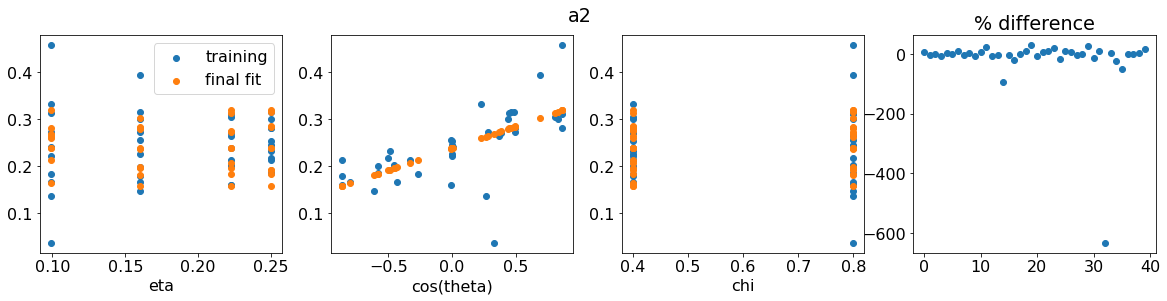

degs: [[0, 0, 0], [0, 0, 1], [0, 1, 0]]


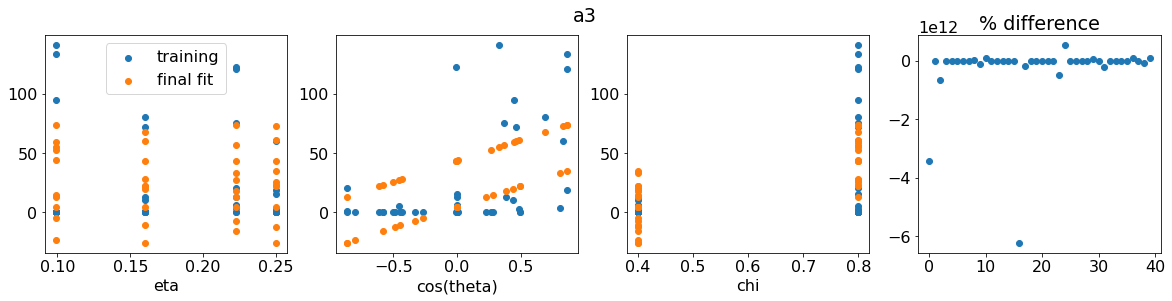

degs: [[0, 0, 0]]


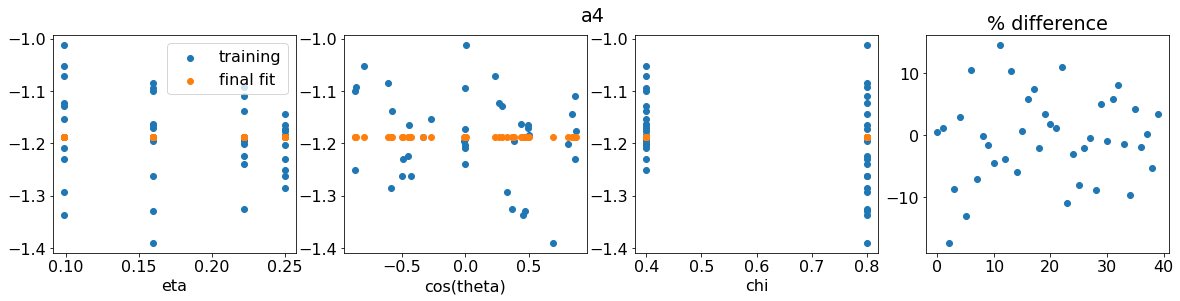

degs: [[0, 0, 0]]


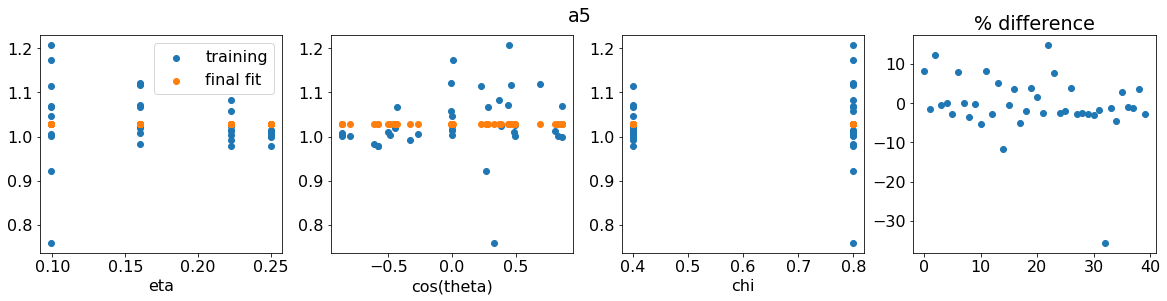

In [118]:
y_fits = []
maxdegs=[3,4,4,4,4]
suptitles = ['a1', 'a2', 'a3', 'a4', 'a5']
for i in range(psf_y.shape[1]):
    y_fits.append(fit(psf_coords, psf_y[:,i].reshape(-1,1), title=suptitles[i], maxdeg=maxdegs[i], scaleX=True, scaleY=True))

In [119]:
for yf in y_fits:
    print(yf.w_ml)

[[ 0.28879442]
 [ 0.32621217]
 [-0.75854439]
 [ 0.41626637]
 [-0.26048484]]
[[-5.55111512e-17]
 [ 6.60050991e-01]]
[[1.38777878e-17]
 [4.55623848e-01]
 [4.33106985e-01]]
[[5.51291859e-16]]
[[-9.61914964e-16]]


In [120]:
y_fits[1].degrees

[[0, 0, 0], [0, 1, 0]]